### Proyecto Individual #2.
Accidentes Aereos.

#### Objetivo:
La Organización de Aviación Civil Internacional (OACI), organismo de la Organización de las Naciones Unidas, quiere investigar en profundidad los accidentes producidos desde inicios del siglo XX. Para ello, el objetivo principal es poder obtener un análisis de datos relacionado a esto, junto a un dashboard que complemente los análisis con sus visualizaciones.

#### Preprocesamiento de Datos.
1. *Limpieza de Datos:* Identificar y tratar valores faltantes, duplicados o incorrectos en el conjunto de datos.

2. *Transformación de Datos:* Realizar transformaciones necesarias en los datos, como normalización, escalamiento o codificación de variables categóricas.

3. *Selección de Características:* En algunos casos, seleccionar un subconjunto relevante de las características disponibles para reducir la dimensionalidad o mejorar la calidad del análisis.

4. *Manejo de Valores Atípicos:* Identificar y decidir cómo manejar valores atípicos que pueden afectar el análisis.

5. *Tratamiento de Datos Desbalanceados:* Si los datos están desequilibrados en términos de clases o categorías, se pueden aplicar técnicas para abordar este desequilibrio.

#### Imporatcion de Librerias.

In [114]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import copy 
import json
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
from datetime import datetime

#### Lectura de Archivo csv. para:
* Creacion del DataFrame travez de la lectura del Archivo csv.
* Observando el DataFrame.
* Ver su dimención.
* Ver la información de cada columna.
* Descripción Estadística.
* Cuantificación de la presencia del caracter "?".

In [115]:
# Lectura del archivo csv e instanciado en df para su uso de un DataFrame.
df_AccidentesA=pd.read_csv(r'C:\Users\ingju\Desktop\proyect02\csv\AccidentesAviones_O.csv') 
df_AccidentesA.head(1) 

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


In [116]:
# Como esta Dimensionado.
df_AccidentesA.shape

(5008, 18)

In [117]:
# Ver la información de cada columna.
df_AccidentesA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [118]:
# Descripción estadistica.
df_AccidentesA.describe()

,Unnamed: 0
count,5008.000000
mean,2503.500000
std,1445.829404
min,0.000000
25%,1251.750000
50%,2503.500000
75%,3755.250000
max,5007.000000


In [119]:
# Cuantificación de la presencia del caracter "?"
columnas = df_AccidentesA.columns
pd.DataFrame(["Cantidad de '?' en '"+columna+"': "+str(df_AccidentesA[df_AccidentesA[columna] == "?"][columna].count()) for columna in columnas]).style.hide().hide(axis=1)

Cantidad de '?' en 'Unnamed: 0': 0
Cantidad de '?' en 'fecha': 0
Cantidad de '?' en 'HORA declarada': 1504
Cantidad de '?' en 'Ruta': 5
Cantidad de '?' en 'OperadOR': 10
Cantidad de '?' en 'flight_no': 3682
Cantidad de '?' en 'route': 762
Cantidad de '?' en 'ac_type': 13
Cantidad de '?' en 'registration': 272
Cantidad de '?' en 'cn_ln': 667
Cantidad de '?' en 'all_aboard': 17


##### Conclusión.
* Se observa que hay columnas con nombres en ingles y español.
* Se observa que hay columnas que no son necesarias.
* Se observa que hay que cambiar valores de las columnas que tienen el simbolo ?.


### Normalización de Columnas.
* Información de las columnas.
* Renombrar y normalizar nombres de las columnas.
* Analizamos los distintos tipos de datos por columna.
* Eliminación de Columnas inecesarias.
* Vemos como queda Dimensionado.

Información de las columnas del dataframe.
| *Columna* | *Descripción* | *Traducción* |
| --- | --- | --- |
| Date | Date of accident | Fecha del accidente |
| Time | Local time, in 24 hr. in the format hh:mm | Hora local, en 24 h. en el formato hh:mm |
| Location | Location of the accident | Ubicación del accidente |
| Operator | Airline or operator of the aircraft | Línea aérea u operador de la aeronave |
| Flight | Flight number assigned by the aircraft operator | Número de vuelo asignado por el operador de la aeronave |
| Route | Complete or partial route flown prior to the accident | Ruta completa o parcial realizada antes del accidente |
| Type | Aircraft type | Tipo de aeronave |
| Registration | ICAO registration of the aircraft | Registro OACI de la aeronave |
| cn/In | Construction or serial number / Line or fuselage number | Número de construcción o de serie / Número de línea o de fuselaje |
| Total Aboard | Total people aboard | Total de personas a bordo |
| Passengers Aboard | Passengers aboard | Pasajeros a bordo |
| Crew Aboard | Crew aboard | Tripulación a bordo |
| Total Fatalities | Total fatalities | Total de muertes |
| Passengers Fatalities | Passengers fatalities | Muertes de Pasajeros |
| Crew Fatalities | Crew fatalities | Muertes de la tripulación |
| Ground | Total killed on the ground | Total de muertos en tierra |
| Summary | Brief description of the accident and cause if known | Breve descripción del accidente y causa si se conoce |

In [120]:
# Renombrar y normalizar nombres de las columnas.
df_AccidentesA.rename(columns={ 'fecha': 'date', 
                    'HORA declarada': 'time',
                    'Ruta': 'location',
                    'OperadOR': 'airline_operator',
                    'flight_no': 'flight_no',
                    'ac_type': 'aircraft_type',
                    'registration': 'aircraft_registration',
                    'cn_ln': 'construction_fuselage_number',
                    'all_aboard': 'total_aboard',
                    'PASAJEROS A BORDO': 'passengers_aboard',
                    'crew_aboard': 'crew_aboard',
                    'cantidad de fallecidos': 'total_fatalities',
                    'passenger_fatalities': 'passengers_fatalities',
                    'crew_fatalities': 'crew_fatalities',
                    'ground': 'total_killed_ground',
                    'summary': 'summary'
}, inplace=True)
df_AccidentesA.head()

,Unnamed: 0,date,time,location,airline_operator,flight_no,route,aircraft_type,aircraft_registration,construction_fuselage_number,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [121]:
# Analizamos los distintos tipos de datos por columna.
for col in df_AccidentesA.columns:
  print(df_AccidentesA[col].unique())

[   0    1    2 ... 5005 5006 5007]
['September 17, 1908' 'September 07, 1909' 'July 12, 1912' ...
 'June 10, 2021' 'July 04, 2021' 'July 06, 2021']
['1718' '?' '0630' ... '0729' '0722' '1914']
['Fort Myer, Virginia' 'Juvisy-sur-Orge, France'
 'Atlantic City, New Jersey' ... 'Near Pyin Oo Lwin, Myanmar'
 'Patikul, Sulu, Philippines' 'Palana, Russia']
['Military - U.S. Army' '?' 'Military - U.S. Navy' ...
 'South Sudan Supreme Airlines' 'Soloy Helicopters'
 'Kamchatka Aviation Enterprise']
['?' 'F-AIKG' '7' '599' '6' '4' '1' '14' '34' '23' '15A' 'LZ 129' '2' '8'
 '9' '229' '19' '16' '21' '3' '203' '5' '71' '7208' '28' 'V-1104' '9035'
 '777' '63' '218' '-' '13' '161' '6001' '142' '45' '216' '42' '105' '16B'
 '6-103' '513' '878' '850' '942' '404' '44' '115' '140' '48' '6963' '2207'
 '665' '521' '605' '410' '121' '311' '608' '1629' '923' '10' '009' '572'
 '611' '700' '4422' '1-10' '624' '343' '072' '421' '331' '060' '6427'
 '100' '897R' '557' '11-8' '537' '157' '500' '307' '2501' '903' '32

In [122]:
# Eliminamos las siguientes columnas por no considerarlas relevantes para nuestro análisis
# Unnamed 0: No representa nada
# aircraft_registration: No usare el registro de aeronave porque no are cruce con otros datos.
# construction_fuselage_number: No usare el número de fuselaje porque no are cruce con otros datos.

df_AccidentesA.drop(columns=['Unnamed: 0', 'aircraft_registration', 'construction_fuselage_number', 'total_killed_ground'], inplace = True)
df_AccidentesA.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'total_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passengers_fatalities', 'crew_fatalities',
       'summary'],
      dtype='object')

In [123]:
# Vemos como queda Dimensionado.
df_AccidentesA.shape

(5008, 14)

### Modificando Columnas.

##### 01-Columna Date. (Fecha del accidente).
* Observamos los datos Unicos de la columna date.
* Función para la conversion de fecha.
* Reemplazando valores en la columna fecha.
* Cambiamos la columna date al tipo fecha.
* Observamos los valores en la columna date.
* Obtenemos los valores únicos de la columna time.

In [124]:
# Observamos los datos Unicos de la columna date.
df_AccidentesA.date.unique()

array(['September 17, 1908', 'September 07, 1909', 'July 12, 1912', ...,
       'June 10, 2021', 'July 04, 2021', 'July 06, 2021'], dtype=object)

In [125]:
# Función para la conversión de fecha.
def convertir_fecha(fecha):
    fecha_objeto = datetime.strptime(fecha, '%B %d, %Y')
    fecha_transformada = fecha_objeto.strftime('%Y-%m-%d')
    return fecha_transformada

# Aplicamos la conversión a la columna 'date'
df_AccidentesA['date'] = df_AccidentesA['date'].apply(convertir_fecha)

In [126]:
# Reemplazando valores en la columna fecha.
df_AccidentesA['date'] = df_AccidentesA['date'].fillna('') # Reemplazamos los valores nulos por un valor vacío
df_AccidentesA['date'] = df_AccidentesA['date'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío

In [127]:
# Cambiamos la columna date al tipo fecha.
df_AccidentesA['date'] = pd.to_datetime(df_AccidentesA['date'])
df_AccidentesA.date.info() # nos muestra la información de la columna date.

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: date
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


In [128]:
# Observamos los valores en la columna date.
df_AccidentesA.date

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: date, Length: 5008, dtype: datetime64[ns]

In [129]:
# Instanciamos nuestro DataFrame, para que no se pirdan cambios.
df_AccidentesA = df_AccidentesA

##### 02-Columna Time. (Hora local, en 24 h. en el formato hh:mm).
* Observamos los valores unicos de la columna time.
* Agregamos ':' entre los números en la columna time.
* Observamos el cambio con la agregacion de los :.
* Usamos la función para convertir los valores de la columna "time" a tipo datetime.time.
* Obtenemos los valores únicos de la columna time.
* Colocamos algunos faltantes en valores Nulos.
* Procederemos a eliminar esa cantidad de Nulos, en la columna time.

In [130]:
# Observamos los valores unicos de la columna time.
df_AccidentesA.time.unique()

array(['1718', '?', '0630', ..., '0729', '0722', '1914'], dtype=object)

In [131]:
# Agregamos ':' entre los números en la columna time.
df_AccidentesA['time'] = df_AccidentesA['time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [132]:
# Observamos el cambio con la agregacion de los :
df_AccidentesA.time

0       17:18
1           ?
2       06:30
3           ?
4       18:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: time, Length: 5008, dtype: object

In [133]:
# Función para convertir los valores de la columna "time" a tipo datetime.time
def convertir_a_tiempo(time_str):
    try:
        return pd.to_datetime(time_str, format='%H:%M:%S').time()
    except ValueError:
        try:
            # Intenta con un formato alternativo sin segundos
            return pd.to_datetime(time_str, format='%H:%M').time()
        except ValueError:
            return None  # Si no se puede convertir, retorna None

# Aplica la función de conversión a la columna "time"
df_AccidentesA['time'] = df_AccidentesA['time'].apply(convertir_a_tiempo)

In [134]:
# Obtenemos los valores únicos de la columna time.
valores_unicos = df_AccidentesA['time'].unique()
for valor in valores_unicos: # recorriendo los valores únicos.
    print(valor) # Imprimiendo los valores.

17:18:00
None
06:30:00
18:30:00
10:30:00
01:00:00
15:20:00
23:45:00
05:15:00
08:45:00
07:00:00
07:45:00
21:30:00
10:00:00
16:55:00
12:15:00
17:40:00
11:40:00
13:15:00
16:45:00
13:42:00
17:30:00
05:30:00
09:30:00
15:27:00
08:00:00
08:30:00
04:05:00
14:48:00
11:30:00
10:45:00
17:00:00
09:18:00
11:45:00
21:00:00
11:01:00
18:00:00
10:10:00
09:35:00
18:23:00
15:00:00
02:05:00
09:45:00
22:40:00
13:00:00
23:30:00
22:30:00
09:00:00
08:40:00
20:00:00
04:00:00
06:48:00
05:45:00
02:00:00
19:30:00
12:00:00
00:10:00
06:00:00
02:07:00
20:07:00
14:30:00
12:30:00
07:40:00
03:15:00
15:40:00
11:20:00
22:35:00
16:00:00
18:15:00
14:15:00
05:00:00
11:00:00
09:50:00
22:45:00
10:50:00
23:42:00
07:30:00
03:33:00
02:52:00
19:00:00
00:45:00
15:18:00
03:30:00
18:35:00
22:25:00
14:36:00
09:40:00
14:20:00
20:18:00
20:08:00
23:00:00
09:55:00
02:19:00
19:40:00
04:40:00
19:15:00
19:32:00
03:52:00
19:10:00
10:20:00
05:20:00
22:00:00
03:00:00
14:00:00
03:38:00
10:47:00
03:14:00
03:23:00
20:47:00
19:38:00
11:07:00
20:50

In [135]:
# Colocamos algunos faltantes en valores Nulos.
df_AccidentesA['time'].fillna(method='ffill',inplace=True)

In [136]:
# Observamos que el valor de Nulos en la columna Time es muy alto.
# Procederemos a eliminar esa cantidad de Nulos, en la columna time.
df_AccidentesA = df_AccidentesA.dropna(subset=['time'])

In [137]:
# Instanciamos nuestro DataFrame, para que no se pirdan cambios.
df_AccidentesA = df_AccidentesA

#### 03-Columna Location. (Ubicación del accidente).
* Obteniendo los valores únicos de la columna location.
* Obteniendo cuantos valores únicos tenemos.
* Reemplazando valores en la columna location.
* Análisis de las palabras que más se repiten, para reducir la cantidad de lugares.
* Modificaremos la columna 'location' para extraer el país en función a las coincidencias con la siguiente lista.
* Función para la colocación de valores, en una nueva columna llamada country.
* Observamos como quedo la nueva columna.
* Observamos los valores unicos de la columna country.
* Total de valores únicos.
* Observando que muchos de los valores corresponden a estados de los EU. reemplazamos en la columnas country el valor other por United States en una nueva columna llamada location que contiene los estados de los EU.
* Observamos como quedo la columna location.
* Separamos vuelos en una nueva columna llamada surface, considerando si la aeronave colisionó en agua o suelo.
* Observamos la columna surface.
* Observamos los valores únicos de la columna surface.
* Filtramos los registros para water, para tener un número razonable para el análisis.
* Obtendremos un top 10 de los países con más accidentes, para verificar que nuestra columna country contiene varios de los valores observados en la nube de palabras.
* Filtramos las filas donde el campo country es igual a other.
* Filtramos registros donde la superficie sea ground y other en país.
  * Vemos si estos filtros representan una gran cantidad dentro del dataset, para crear una nuva columna para nuestro futuro análisis.
  * Observamos que por lo general corresponen a valores mal escritos, y no usaremos estos filtros por el momento,ya que tenemos la columna country con los paises más representativos.. 

In [138]:
# Obteniendo los valores únicos de la columna location.
df_AccidentesA.location.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

In [139]:
# Obteniendo cuantos valores únicos tenemos.
df_AccidentesA.location.nunique()

4125

In [140]:
# Reemplazando valores en la columna location.
df_AccidentesA ['location'] = df_AccidentesA['location'].fillna('') # Reemplazamos los valores nulos por un valor vacío
df_AccidentesA ['location'] = df_AccidentesA['location'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío

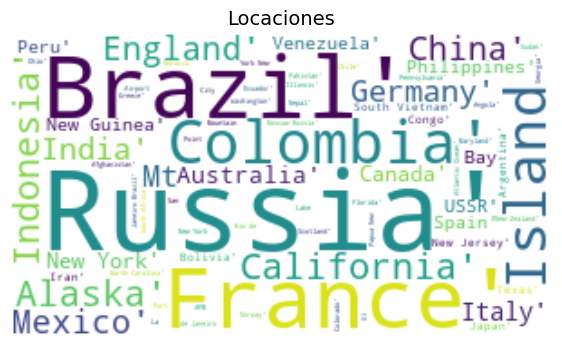

In [141]:
# Análisis de las palabras que más se repiten, para reducir la cantidad de lugares.
# Observamos una nube de palabras para ver las locaciones que más se repiten.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df_AccidentesA.location.tolist())
globe_mask = np.array(Image.open(r'C:\Users\ingju\Desktop\proyect02\src\dOs.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Locaciones', loc='Center', fontsize=14)
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\nub99', dpi=50)
plt.show()

In [142]:
# Modificaremos la columna 'location' para extraer el país en función a las coincidencias con la siguiente lista.
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [143]:
# Función para la colocación de valores.
def obtener_pais(location): # Definimos la función que colocará los valores en country.
    for pais in lista_paises:
        if pais.lower() in location.lower(): # Si no encuentra coincidencia en location colocará other
            return pais
    return 'other'
df_AccidentesA['country'] = df_AccidentesA['location'].apply(obtener_pais) # Aplicamos la función obtener_pais a la columna location y creamos la columna country

In [144]:
# Observamos como quedo la nueva columna.
df_AccidentesA['country']

0             other
1            France
2             other
3            Canada
4             other
           ...     
5003          other
5004        Nigeria
5005        Myanmar
5006    Philippines
5007         Russia
Name: country, Length: 5008, dtype: object

In [145]:
# Observamos los valores unicos de la columna country.
df_AccidentesA.country.unique()

array(['other', 'France', 'Canada', 'Germany', 'Belgium', 'England',
       'Denmark', 'Italy', 'India', 'Spain', 'Australia', 'China',
       'Morocco', 'United Kingdom', 'Oman', 'Russia', 'Colombia',
       'United States', 'Georgia', 'Hungary', 'Mauritania', 'Slovakia',
       'Algeria', 'Finland', 'Uruguay', 'Brazil', 'Netherlands', 'Greece',
       'Mexico', 'Cuba', 'Iran', 'Madagascar', 'Argentina', 'New Zealand',
       'Bulgaria', 'South Africa', 'Thailand', 'Iraq', 'Chile', 'Lebanon',
       'Bolivia', 'Ukraine', 'Peru', 'Syria', 'Pakistan', 'Egypt',
       'Honduras', 'Switzerland', 'Panama', 'Poland', 'Sweden', 'Norway',
       'Croatia', 'Tajikistan', 'Libya', 'Gambia', 'Guinea', 'Sudan',
       'Samoa', 'Tanzania', 'Kenya', 'Japan', 'Mozambique', 'Ecuador',
       'Malta', 'Indonesia', 'Scotland', 'Estonia', 'Puerto Rico',
       'Turkmenistan', 'Kazakhstan', 'Austria', 'Portugal', 'Guyana',
       'Ireland', 'Nicaragua', 'Ivory Coast', 'Philippines', 'Bahamas',
       'Li

In [146]:
# Total de valores únicos.
df_AccidentesA.country.nunique()

165

In [147]:
# Se observa que muchos de los valores corresponden a estados de los EU.
# Creamos una lista de estados de los Estados Unidos.
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
# Reemplazamos en la columnas country el valor other por United States si la columna location contiene un estado de los EU.
df_AccidentesA.loc[df_AccidentesA['location'].str.contains('|'.join(states_usa), case=False, na=False), 'country'] = 'United States'

In [148]:
# Observamos como quedo la columna location.
df_AccidentesA['location']

0                      Fort Myer, Virginia
1                  Juvisy-sur-Orge, France
2                Atlantic City, New Jersey
3       Victoria, British Columbia, Canada
4                       Over the North Sea
                       ...                
5003                    Near Butte, Alaska
5004                  Near Kaduna, Nigeria
5005            Near Pyin Oo Lwin, Myanmar
5006            Patikul, Sulu, Philippines
5007                        Palana, Russia
Name: location, Length: 5008, dtype: object

In [149]:
# Separamos vuelos considerando si la aeronave colisionó en agua o suelo.
import re

def assign_surface(location): # Definimos una función para asignar valores a la columna 'surface'
    if re.search(r'\bsea\b|\bocean\b|\briver\b|\bchannel\b|\bover\b', location, flags=re.IGNORECASE):
        return 'water'
    else:
        return 'ground'
df_AccidentesA['surface'] = df_AccidentesA['location'].apply(assign_surface) # Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar

In [150]:
# Observamos la columna surface.
df_AccidentesA['surface']

0       ground
1       ground
2       ground
3       ground
4        water
         ...  
5003    ground
5004    ground
5005    ground
5006    ground
5007    ground
Name: surface, Length: 5008, dtype: object

In [151]:
# Observamos los valores únicos de la columna surface.
df_AccidentesA.surface.unique()

array(['ground', 'water'], dtype=object)

In [152]:
# Filtramos los registros para water, para tener un número razonable para el análisis.
df_AccidentesA[df_AccidentesA['surface'] == 'water']

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water
15,1917-05-14,05:15:00,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08:45:00,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,other,water
20,1918-04-07,21:30:00,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,other,water
22,1918-08-11,10:00:00,"Ameland Island, North Sea",Military - German Navy,?,?,Zeppelin L-53 (airship),19,?,?,19,?,?,Shot down by british aircraft.,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2008-04-28,09:38:00,"Off Crimea, Black Sea",Naftogaz,?,?,Mil Mi-8T,20,18,2,20,18,2,The helicopter crashed after the tail section ...,other,water
4729,2009-06-01,00:15:00,"Atlantic Ocean, 570 miles northeast of Natal, ...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,228,216,12,228,216,12,The Airbus went missing over the Atlantic Ocea...,Brazil,water
4886,2014-03-08,02:41:00,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,239,227,12,239,227,12,Radar contact was lost with the aircraft 2 hou...,India,water
4904,2014-12-28,06:18:00,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,The aircraft went missing while en route from ...,other,water


In [153]:
# Obtendremos un top 10 de los países con más accidentes.
# Para verificar que nuestra columna country contiene varios de los valores observados en la nube de palabras.
total_accidentes_por_pais = df_AccidentesA.groupby('country')['date'].count()  # Agrupamos los datos por país y sumamos la cantidad de accidentes

total_accidentes_por_pais = total_accidentes_por_pais.drop('other', errors='ignore') # Excluimos el valor other.

top_10_paises = total_accidentes_por_pais.nlargest(10) # Obtenemos el top 10 de países por accidente.
top_10_paises

country
United States    1037
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
China              98
Name: date, dtype: int64

In [154]:
# Filtramos las filas donde el campo country es igual a other.
df_other = df_AccidentesA.loc[df_AccidentesA['country'] == 'other']
df_other

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water
8,1916-07-28,15:20:00,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground
15,1917-05-14,05:15:00,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08:45:00,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,other,water
20,1918-04-07,21:30:00,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,2013-11-29,13:30:00,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,other,ground
4904,2014-12-28,06:18:00,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,The aircraft went missing while en route from ...,other,water
4954,2017-07-10,16:00:00,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18:15:00,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",other,ground


In [155]:
# Filtramos registros donde la superficie sea ground y other en país.
df_AccidentesA[(df_AccidentesA['surface'] == 'ground') & (df_AccidentesA['country'] == 'other')]

# Vemos si esstos filtros hechos representan una gran cantidad dentro del dataset.
# Y Observamos que por lo general corresponen a valores mal escritos, y no usaremos estos filtros por el momento, 
# ya que tenemos la columna country con los paises más representativos.. 

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
8,1916-07-28,15:20:00,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground
32,1919-12-11,16:55:00,"Catherham, Surrey, UK",Aircraft Travel Transport,?,Paris - Hounslow,de Havilland DH-4,1,1,1,1,1,1,Crashed in a field while attemptting to land.,other,ground
39,1920-07-20,16:55:00,"Cartagena, Columbia",Compañia Colombiana de Navegación Aérea,?,?,Farman F-40,1,1,1,1,1,1,Crashed while taking off after engine failure....,other,ground
51,1921-02-03,12:15:00,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,1,0,1,1,0,1,Shortly after takeoff from Minneapolis-World C...,other,ground
53,1921-02-15,12:15:00,Off Gibraltar,Aeropostale,?,?,Breguet 14,2,0,2,2,0,2,The mail fligh encountered poor weather condit...,other,ground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,2013-07-07,11:20:00,"Soldotna, Alaksa",Rediske Air,?,Soldotna - Bear Lodge,de Havilland Canada DHC-3T,10,9,1,10,9,1,As soon as the plane took off speed began to d...,other,ground
4879,2013-11-29,13:30:00,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,other,ground
4954,2017-07-10,16:00:00,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18:15:00,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",other,ground


In [156]:
df_AccidentesA = df_AccidentesA

#### 04-Columna Airline_Operador. (Línea aérea u operador de la aeronave).
* Analizamos operadores de aerolíneas.
* Contando cuantos valores únicos .
* Reemplazando valores en la columna airline_operator.
* Obtenemos los valores únicos de la columna airline_operator.
* Creamos una nube de palabras para observar las palabras que más se repiten.
  * Basada en operador o aeronave.
* Verificamos si alguna de las palabras clave está presente en la columna airline_operator.
* Observamos y Instanciamos  la columna category, para obtener el valor.


In [157]:
# Analizamos operadores de aerolíneas.
df_AccidentesA.airline_operator.unique()

array(['Military - U.S. Army', '?', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

In [158]:
# Contando cuantos valores únicos .
df_AccidentesA.airline_operator.nunique()

2268

In [159]:
# Reemplazando valores en la columna airline_operator.
df_AccidentesA['airline_operator'] = df_AccidentesA['airline_operator'].fillna('') # Reemplazamos los valores nulos por un valor vacío
df_AccidentesA['airline_operator'] = df_AccidentesA['airline_operator'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío

In [160]:
# Obtenemos los valores únicos de la columna airline_operator, para despues ir recoriendo los valores únicos optenidos.
valores_unicos = df_AccidentesA['airline_operator'].unique()
for valor in valores_unicos: # recorriendo los valores únicos.
    print(valor) # Imprimiendo los valores.

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

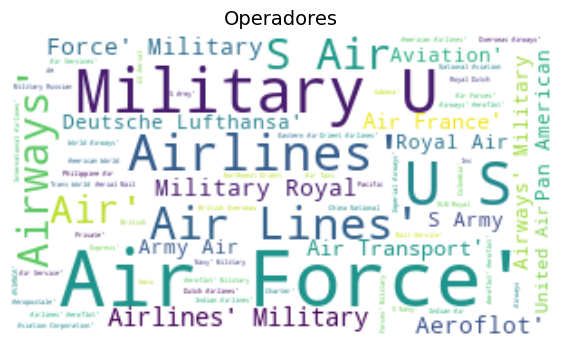

In [161]:
# Creamos una nube de palabras para observar las palabras que más se repiten.
# Basada en operador o aeronave.

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df_AccidentesA.airline_operator.tolist())
plane_mask = np.array(Image.open(r'C:\Users\ingju\Desktop\proyect02\src\dOs.jpg'))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Operadores', loc='Center', fontsize=14)
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\nub98', dpi=50)
plt.show()

# Observamos gran presencia de vuelos militares dentro del campo (palabras como 'military', 'air force', 'Army')

In [162]:
# Verificamos si alguna de las palabras clave está presente en la columna airline_operator.
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos la nueva columna y separamos los vuelos por Militar y No militar
df_AccidentesA['category'] = np.where(df_AccidentesA['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'non-military')

In [163]:
# Observamos y Instanciamos  la columna category, para obtener el valor.
df_grouped = df_AccidentesA['category'].value_counts()
df_grouped

category
non-military    4217
military         791
Name: count, dtype: int64

In [164]:
df_AccidentesA = df_AccidentesA

#### 05-Columna Flight_no. (Número de vuelo asignado por el operador de la aeronave).
* Obteniendo valor únicos de la columna flight_no.
* Reemplazando valores en la columna airline_operator.
* Obtenemos los valores únicos de la columna flight_no.
* Observando su hay valores Nulos en la columna flight_no.

In [165]:
# Obteniendo valor únicos de la columna flight_no.
df_AccidentesA.flight_no.unique()

array(['?', 'F-AIKG', '7', '599', '6', '4', '1', '14', '34', '23', '15A',
       'LZ 129', '2', '8', '9', '229', '19', '16', '21', '3', '203', '5',
       '71', '7208', '28', 'V-1104', '9035', '777', '63', '218', '-',
       '13', '161', '6001', '142', '45', '216', '42', '105', '16B',
       '6-103', '513', '878', '850', '942', '404', '44', '115', '140',
       '48', '6963', '2207', '665', '521', '605', '410', '121', '311',
       '608', '1629', '923', '10', '009', '572', '611', '700', '4422',
       '1-10', '624', '343', '072', '421', '331', '060', '6427', '100',
       '897R', '557', '11-8', '537', '157', '500', '307', '2501', '903',
       '32', '245', '83', '493', '129', '151', '610', '615', 'CAM5763',
       '44-2', '501', '324', '6780', '101', '4-2', '526A', '416W', '202',
       '251', '201', '376', '841', '1-6-6A', '470', '162', '636',
       '783/057', '318', '18', '512', '723', '627', '783', '304/44',
       '270', '781', '314', '152', '971', '633', '136', '57', '792',
      

In [166]:
# Reemplazando valores en la columna airline_operator.
df_AccidentesA['flight_no'] = df_AccidentesA['flight_no'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['flight_no'] = df_AccidentesA['flight_no'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío

In [167]:
# Obtenemos los valores únicos de la columna flight_no, para despues ir recoriendo los valores únicos optenidos.
valores_unicos = df_AccidentesA['flight_no'].unique()
for valor in valores_unicos: # recorriendo los valores únicos.
    print(valor) # Imprimiendo los valores.


F-AIKG
7
599
6
4
1
14
34
23
15A
LZ 129
2
8
9
229
19
16
21
3
203
5
71
7208
28
V-1104
9035
777
63
218
-
13
161
6001
142
45
216
42
105
16B
6-103
513
878
850
942
404
44
115
140
48
6963
2207
665
521
605
410
121
311
608
1629
923
10
009
572
611
700
4422
1-10
624
343
072
421
331
060
6427
100
897R
557
11-8
537
157
500
307
2501
903
32
245
83
493
129
151
610
615
CAM5763
44-2
501
324
6780
101
4-2
526A
416W
202
251
201
376
841
1-6-6A
470
162
636
783/057
318
18
512
723
627
783
304/44
270
781
314
152
971
633
136
57
792
451
4844-C
329
260
626
591
711
845/26
560
402/46
476
214
24
409
629
17K
976
642
400
253
718 / 2
304
190
701
943
810-9
327
823
411
1800
111
232
844
39
103
285
11
609
543
67
222
736
205
300
607E
258
164
495
466
308
502
601
320
402
75
983
891
514
542
200
1349
1658
315
967
595
371
233
330
2511
20
871
671
710
901
503
207
538
1-11
372
613
698
36
804
830/18
738
375
0005
104
26
081
826/266
S85
651
401
424
548
210
406
897
381
859
511
529
2005
706
201/8
92
153
739/14
7816
56
007
117
902
40
771


In [168]:
# Observando su hay valores Nulos en la columna flight_no.
df_AccidentesA.flight_no.isna().sum()
# Nos da como resultado =  0 Nulos.

0

In [169]:
df_AccidentesA = df_AccidentesA

#### 06-Columna Route. (Ruta completa o parcial realizada antes del accidente.)
* Vemos los valores únicos de la columna route.
* Reemplazando valores en la route.
* Obtenemos los valores únicos de la columna flight_no, para despues ir recoriendo los valores únicos optenidos.
  * Observamos más de 1 valor dentro de las rutas y por ende consideramos que no es posible hacer transformaciones sobre los valores en este paso
  * No podemos saber en qué tramo ocurrió el accidente y nos quedaremos solamente con el país y la superficie donde ocurrió el mismo.
* Obtniendo el total de valores únicos.




In [170]:
# Vemos los valores únicos de la columna route.
df_AccidentesA.route.unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [171]:
# Reemplazando valores en la route.
df_AccidentesA['route'] = df_AccidentesA['route'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['route'] = df_AccidentesA['route'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío.

In [172]:
# Obtenemos los valores únicos de la columna flight_no, para despues ir recoriendo los valores únicos optenidos.
valores_unicos = df_AccidentesA['route'].unique()
for valor in valores_unicos: # recorriendo los valores únicos.
    print(valor) # Imprimiendo los valores.

# Observamos más de 1 valor dentro de las rutas y por ende consideramos que no es posible hacer transformaciones sobre los valores en este paso
# No podemos saber en qué tramo ocurrió el accidente y nos quedaremos solamente con el país y la superficie donde ocurrió el mismo.

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

In [173]:
# Obtniendo el total de valores únicos.
df_AccidentesA.route.nunique()

3838

In [174]:
df_AccidentesA = df_AccidentesA

#### 07-Columna Aircraft_Type. (Tipo de aeronave).
* Obteniendo los valores únicos de la columna aircraft_type.
* Reemplazando valores en la aircraft_type.
* Obtniendo el total de valores únicos.
* Categorizando las aeronaves por marca (50 históricas).
* Creamos Función para asignar valores a una nueva columna llamada brand (marca).
* Observando como va quedando nuestro DataFrame.

In [175]:
# Obteniendo los valores únicos de la columna aircraft_type.
df_AccidentesA.aircraft_type.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [176]:
# Reemplazando valores en la aircraft_type.
df_AccidentesA['aircraft_type'] = df_AccidentesA['aircraft_type'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['aircraft_type'] = df_AccidentesA['aircraft_type'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío.

In [177]:
# Obtniendo el total de valores únicos.
df_AccidentesA.aircraft_type.nunique()

2469

In [178]:
# Categorizando las aeronaves por marca (50 históricas).
marcas_aeronaves_historicas = ['Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
                              'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
                              'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
                              'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
                              'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
                              'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
                              'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
                              'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
                              'Harbin Aircraft Manufacturing Corporation', 'English Electric',
                              'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
                              'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
                              'Sopwith Aviation Company']

In [179]:
# Creamos Función para asignar valores a una nueva columna llamada brand (marca).
def assign_brand(aircraft_type):
    for brand in marcas_aeronaves_historicas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'other'
df_AccidentesA['brand'] = df_AccidentesA['aircraft_type'].apply(assign_brand) # Aplicamos la función a la columna 'aircraft_type' para crear la columna brand (marca)

In [180]:
# Observando como va quedando nuestro DataFrame.
df_AccidentesA.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2,1,1,1,1,0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1,0,1,1,0,0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5,0,5,5,0,5,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1,0,1,1,0,1,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water,military,other


In [181]:
df_AccidentesA = df_AccidentesA

#### 08-Columna Total_aboard. (Total Abordo).
* Observando si hay valores Nulos y cuantos hay si es que existen.
  * Observamos que nos muestra que tenemos 0 valores Nulos.
* Mostrando los valores únicos de la columna total_aboard.
* Contando los valores únicos.
* Remplazando valores en la columna total_aboard.
* Convertimos la columna total_abord a tipo numérico.
* Obteniendo los valores únicos despues deremplazar los valores.
* Obteniendo el total de los valores únicos déspues de reemplazar valores, en la columna total_aboard.
  * Nos muestra un registro menos que al principio.
* Filtramos el DataFrame para registros con total_aboard con valores vacios.
* Filtramos el DataFrame para registros con total_aboard con calores igual a 0.
* Eliminamos registros de la columna total_aboard con valores vacios al ser pocos estos registros.
* Observamos si nos queda algún Nulo, y contamos cuantos tenemos en total en caso de tener valores Nulos.
* Observando los valores unicos de la columna total_aboard.
* Obtenemos el total de los valores únicos.

In [182]:
# Observando si hay valores Nulos y cuantos hay si es que existen,
df_AccidentesA.total_aboard.isna().sum()
# Observamos que nos muestra que tenemos 0 valores Nulos.

0

In [183]:
# Mostrando los valores únicos de la columna total_aboard.
df_AccidentesA.total_aboard.unique()

array(['2', '1', '5', '20', '28', '41', '19', '22', '23', '21', '24',
       '16', '18', '?', '14', '0', '8', '3', '49', '45', '6', '7', '17',
       '4', '11', '52', '43', '15', '12', '9', '13', '54', '10', '76',
       '83', '50', '25', '97', '29', '36', '34', '37', '35', '26', '39',
       '31', '27', '30', '59', '44', '38', '32', '42', '53', '48', '40',
       '69', '33', '81', '58', '55', '46', '65', '51', '56', '63', '47',
       '70', '57', '115', '129', '66', '67', '74', '64', '128', '80',
       '62', '101', '159', '68', '79', '61', '73', '99', '60', '94', '72',
       '106', '78', '85', '122', '77', '88', '119', '95', '111', '107',
       '132', '112', '84', '105', '86', '118', '87', '103', '127', '153',
       '91', '117', '133', '124', '98', '82', '90', '130', '102', '155',
       '89', '120', '109', '100', '75', '229', '93', '126', '164', '218',
       '121', '92', '104', '156', '108', '174', '176', '202', '113',
       '182', '145', '134', '149', '177', '298', '346', '96'

In [184]:
# Contando los valores únicos.
df_AccidentesA.total_aboard.nunique()

245

In [185]:
# Remplazando valores en la columna total_aboard.
df_AccidentesA['total_aboard'] = df_AccidentesA['total_aboard'].fillna('') # Reemplazamos los valores nulos por un valor vacío
df_AccidentesA['total_aboard'] = df_AccidentesA['total_aboard'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío

In [186]:
# Convertimos la columna total_abord a tipo numérico.
df_AccidentesA['total_aboard'] = pd.to_numeric(df_AccidentesA['total_aboard'], errors='coerce')

In [187]:
# Obteniendo los valores únicos despues deremplazar los valores.
df_AccidentesA.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  nan,  14.,   0.,   8.,   3.,  49.,  45.,   6.,   7.,
        17.,   4.,  11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,
        76.,  83.,  50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,
        39.,  31.,  27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,
        40.,  69.,  33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,
        47.,  70.,  57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,
        62., 101., 159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72.,
       106.,  78.,  85., 122.,  77.,  88., 119.,  95., 111., 107., 132.,
       112.,  84., 105.,  86., 118.,  87., 103., 127., 153.,  91., 117.,
       133., 124.,  98.,  82.,  90., 130., 102., 155.,  89., 120., 109.,
       100.,  75., 229.,  93., 126., 164., 218., 121.,  92., 104., 156.,
       108., 174., 176., 202., 113., 182., 145., 134., 149., 177., 298.,
       346.,  96., 157., 191., 330., 188., 131., 25

In [188]:
# Obteniendo el total de los valores únicos déspues de reemplazar valores, en la columna total_aboard.
df_AccidentesA.total_aboard.nunique()
# Nos muestra un registro menos que al principio.

244

In [189]:
# Filtramos el DataFrame para registros con total_aboard con valores vacios.
filtered_df = df_AccidentesA[df_AccidentesA['total_aboard'].isna()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
26,1919-07-21,16:55:00,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,,Shuttle,FD Type Dirigible,NaN,?,?,3,2,1,"The dirigible, cruising at 1,200 ft. caught fi...",United States,ground,non-military,other
103,1925-09-07,05:30:00,"Toul, France",CIDNA,,,Spad 33,NaN,?,?,?,?,?,?,France,ground,non-military,other
347,1934-08-10,09:50:00,"Ningbo, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,?,China,ground,non-military,Sikorsky Aircraft Corporation
384,1935-08-13,08:00:00,"Hangow, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,Destoryed in a storm.,China,ground,non-military,Sikorsky Aircraft Corporation
451,1936-12-26,20:47:00,"Nanking, China",China National Aviation Corporation,,,Douglas DC-2,NaN,?,?,?,?,?,?,China,ground,non-military,McDonnell Douglas
652,1942-10-01,09:00:00,"Kunming, China",China National Aviation Corporation,,,Douglas C-47,NaN,?,?,?,?,?,Crashed while attempting to land after losing ...,China,ground,non-military,McDonnell Douglas
754,1944-11-09,17:15:00,"Seljord, Norway",Military - U.S. Army Air Corps,,,,NaN,?,?,?,?,?,?,Norway,ground,military,other
854,1946-03-18,20:55:00,"Between Chungking and Shanghai, China",China National Aviation Corporation,,Chunking - Shanghai,,NaN,?,?,?,?,?,Disappeared while en route. Plane never located.,China,ground,non-military,other
1231,1951-01-20,14:36:00,"Huilyo, Peru",Military - TAM,,,Douglas DC-3,NaN,?,?,16,?,?,?,Peru,ground,military,McDonnell Douglas
1362,1952-12-22,04:40:00,"Damascus, Syria",Syrian Air,,,Douglas DC-3,NaN,?,?,9,?,?,?,Syria,ground,non-military,McDonnell Douglas


In [190]:
# Filtramos el DataFrame para registros con total_aboard con calores igual a 0.
filtered_df = df_AccidentesA.loc[df_AccidentesA['total_aboard'] == 0]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
30,1919-10-20,16:55:00,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,,De Havilland DH-4,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...,other,water,non-military,De Havilland
120,1927-01-12,08:00:00,"Estaires, France",Fokker,,Delivery flight,Fokker F-VII,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...,France,ground,non-military,Fokker
1121,1949-07-13,07:43:00,"Jamnagar, Gujarat state, India",Indian Air Force,,Training,Hawker Hunter,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...,India,ground,military,Hawker
3144,1981-09-22,07:13:00,"Near Babaeski, Turkey",Military - Turkish Air Force,,,Northrop F-5A,0.0,0,0,0,0,0,The fighter crashed into a village after the p...,Turkey,ground,military,Northrop Grumman
3376,1986-03-27,09:55:00,"Bangui, Central African Republic",Military - French Air Force,,,Sepecat Jaguar A,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...,Central African Republic,ground,military,other


In [191]:
# Eliminamos registros de la columna total_aboard con valores vacios al ser pocos estos registros.
df_AccidentesA = df_AccidentesA.dropna(subset=['total_aboard'])

In [192]:
# Observamos si nos queda algún Nulo, y contamos cuantos tenemos en total en caso de tener valores Nulos.
df_AccidentesA.total_aboard.isna().sum()

0

In [193]:
# Observando los valores unicos de la columna total_aboard.
df_AccidentesA.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  14.,   0.,   8.,   3.,  49.,  45.,   6.,   7.,  17.,
         4.,  11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,  76.,
        83.,  50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,  39.,
        31.,  27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,  40.,
        69.,  33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,  47.,
        70.,  57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,  62.,
       101., 159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72., 106.,
        78.,  85., 122.,  77.,  88., 119.,  95., 111., 107., 132., 112.,
        84., 105.,  86., 118.,  87., 103., 127., 153.,  91., 117., 133.,
       124.,  98.,  82.,  90., 130., 102., 155.,  89., 120., 109., 100.,
        75., 229.,  93., 126., 164., 218., 121.,  92., 104., 156., 108.,
       174., 176., 202., 113., 182., 145., 134., 149., 177., 298., 346.,
        96., 157., 191., 330., 188., 131., 258., 15

In [194]:
# Obtenemos el total de los valores únicos.
df_AccidentesA.total_aboard.nunique()

244

In [195]:
df_AccidentesA = df_AccidentesA

#### 09-Columna Passengers_Aboard. (Pasajeros Abordo).
* Reemplazando valores de la columna passengers_aboard.
* Convertimos la columna passengers_aboard a tipo numérico.
* Observando la cantidad total de valores Nulos.

In [196]:
# Reemplazando valores de la columna passengers_aboard.
df_AccidentesA['passengers_aboard'] = df_AccidentesA['passengers_aboard'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['passengers_aboard'] = df_AccidentesA['passengers_aboard'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío.

In [197]:
# Convertimos la columna passengers_aboard a tipo numérico.
df_AccidentesA['passengers_aboard'] = pd.to_numeric(df_AccidentesA['passengers_aboard'], errors='coerce')

In [198]:
# Observando la cantidad total de valores Nulos.
df_AccidentesA.passengers_aboard.isna().sum()
# Tenemos un total de 204, no los eliminaremos.

204

In [199]:
df_AccidentesA = df_AccidentesA

#### 10-Columna Crew_Aboard. (Tripulacion Abordo).
* Reemplazando valors en la columna crew_aboard.
* Convertimos la columna crew_abord a tipo numérico.
* Observando la cantidad total de valores Nulos.
* Filtramos el DataFrame para las filas con los valores Nulos.
  * Por ser la misma cantidad en la columna 9 passengers_aboard y la columna 10 crew_aboard.

In [200]:
# Reemplazando valors en la columna crew_aboard.
df_AccidentesA['crew_aboard'] = df_AccidentesA['crew_aboard'].fillna('') # Reemplazamos los valores nulos por un valor vacío
df_AccidentesA['crew_aboard'] = df_AccidentesA['crew_aboard'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío

In [201]:
# Convertimos la columna crew_abord a tipo numérico.
df_AccidentesA['crew_aboard'] = pd.to_numeric(df_AccidentesA['crew_aboard'], errors='coerce')

In [202]:
# Observando la cantidad total de valores Nulos.
df_AccidentesA.passengers_aboard.isna().sum()

204

In [203]:
# Al ser la misma cantidad en la columna 9 passengers_aboard y la columna 10 crew_aboard filtramos el DataFrame para las filas con los valores Nulos.
filtered_df = df_AccidentesA[df_AccidentesA['passengers_aboard'].isnull() & df_AccidentesA['crew_aboard'].isnull()]
filtered_df


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,?,?,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,?,?,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,?,?,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,15:20:00,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01:00:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,?,?,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,10:32:00,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,,Mi-8,28.0,NaN,NaN,28,?,?,The military helicopter crashed after hitting ...,Tajikistan,ground,military,other
4791,2010-11-25,12:07:00,"Strezhevoy, Russia",NARZ,,,Mil Mi-8T,10.0,NaN,NaN,7,?,?,"The helicopter, which was delivering workers t...",Russia,ground,non-military,other
4802,2011-04-19,13:57:00,"Tawang, India",Pawan Hans Helicopters Ltd.,,,Mil Mi-172,23.0,NaN,NaN,18,?,?,The helicopter crashed into a hill as it attem...,India,ground,non-military,other
4813,2011-08-06,04:12:00,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,?,?,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing


In [204]:
df_AccidentesA = df_AccidentesA

#### 11-Columna Total_Fatalities. (Muertes totales).
* Reemplazando valores en la columna total_fatalities.
* Convertimos la columna total_fatalities a tipo numérico.
* Obteniendo el total de valores Nulos, enla columna total_fatalities.
  * Nos da como resultado un total de 0 valores Nulos.

In [205]:
# Reemplazando valores en la columna total_fatalities.
df_AccidentesA['total_fatalities'] = df_AccidentesA['total_fatalities'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['total_fatalities'] = df_AccidentesA['total_fatalities'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío.

In [206]:
# Convertimos la columna total_fatalities a tipo numérico .
df_AccidentesA['total_fatalities'] = pd.to_numeric(df_AccidentesA['total_fatalities'], errors='coerce')

In [207]:
# Obteniendo el total de valores Nulos, enla columna total_fatalities.
df_AccidentesA.total_fatalities.isna().sum()
# Nos da como resultado un total de 0 valores Nulos.

0

In [208]:
df_AccidentesA = df_AccidentesA

#### 12-Columna Passengers_Fatalities. (Muerte de Pasajeros).
* Reemplazando valores en la columna passengers_fatalities.
* Convertimos la columna 'passengers_fataliteis' a tipo numérico.
* Obteniendo el valor de los valores Nulos en la columna passengers_fatalities.

In [209]:
# Reemplazando valores en la columna passengers_fatalities.
df_AccidentesA['passengers_fatalities'] = df_AccidentesA['passengers_fatalities'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['passengers_fatalities'] = df_AccidentesA['passengers_fatalities'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío.

In [210]:
# Convertimos la columna 'passengers_fataliteis' a tipo numérico.
df_AccidentesA['passengers_fatalities'] = pd.to_numeric(df_AccidentesA['passengers_fatalities'], errors='coerce')

In [211]:
# Obteniendo el valor de los valores Nulos en la columna passengers_fatalities.
df_AccidentesA.passengers_fatalities.isna().sum()

221

In [212]:
df_AccidentesA = df_AccidentesA

#### 13-Columna Crew_Fatalities. (Muertes de tripulacion.)
* Reemplazar valores en la columna crew_fatalities.
* Convertimos la columna crew_fatalities a tipo numérico.
* Obtener el total de valores Nulos.
* Al ser la misma cantidad filtramos el DataFrame para las filas donde las columnas passengers_fatalities y crew_fatalities son nulos.
  * Probablemente no podamos análizar dichos registros para esas características porque tenemos datos faltantes.

In [213]:
# Reemplazar valores en la columna crew_fatalities.
df_AccidentesA['crew_fatalities'] = df_AccidentesA['crew_fatalities'].fillna('') # Reemplazamos los valores nulos por un valor vacío.
df_AccidentesA['crew_fatalities'] = df_AccidentesA['crew_fatalities'].str.replace('?', '') # Reemplazamos los valores de ? por un valor vacío.

In [214]:
# Convertimos la columna crew_fatalities a tipo numérico.
df_AccidentesA['crew_fatalities'] = pd.to_numeric(df_AccidentesA['crew_fatalities'], errors='coerce')

In [215]:
# Obtener el total de valores Nulos.
df_AccidentesA.crew_fatalities.isna().sum()

220

In [216]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde las columnas passengers_fatalities y crew_fatalities son nulos.
filtered_df = df_AccidentesA[df_AccidentesA['passengers_fatalities'].isnull() & df_AccidentesA['crew_fatalities'].isnull()]
filtered_df
# Probablemente no podamos análizar dichos registros para esas características porque tenemos datos faltantes.

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,15:20:00,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01:00:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,04:12:00,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing
4833,2012-03-16,10:45:00,"Kabul, Afghanistan",Military - Turkish Army (NATO),,,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,The helicopter crashed on the outskirts of Kab...,Afghanistan,ground,military,Sikorsky Aircraft Corporation
4848,2012-10-07,12:00:00,"Near Omdurman, Sudan",Military - Sudanese Air Force,,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,"The transport, carrying military personnel and...",Sudan,ground,military,Antonov
4894,2014-07-07,07:50:00,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,The helicopter crashed about 40 km west of Ha...,Vietnam,ground,military,other


In [217]:
# Calculamos la cantidad de la tripulación de sobrevivientes para cada vuelo y creamos la columna ssurviving crew.
df_AccidentesA['surviving_crew'] = df_AccidentesA['crew_aboard'] - df_AccidentesA['crew_fatalities']

In [218]:
df_AccidentesA

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,water,military,other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5,4.0,1.0,The sightseeing helicopter crashed after missi...,United States,ground,non-military,other,0.0
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11,7.0,4.0,"While on final approach, in poor weather condi...",Nigeria,ground,military,Beechcraft,0.0
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12,11.0,1.0,The plane was carrying military personnel and ...,Myanmar,ground,military,Beechcraft,1.0
5006,2021-07-04,11:30:00,"Patikul, Sulu, Philippines",Military - Philippine Air Force,,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96.0,88.0,8.0,50,NaN,NaN,"While attempting to land at Jolo Airport, the ...",Philippines,ground,military,Lockheed Martin,NaN


In [219]:
df_AccidentesA = df_AccidentesA.dropna(subset=['surviving_crew'])

In [220]:
df_AccidentesA = df_AccidentesA

#### 14-Columna Total_Aboard. (Total Abordo)
* Calculamos la cantidad de sobrevivientes para cada vuelo y creamos la columna survivors.
* Observamos nuestro DataFrame, para ver como va quedando, con nuestra limpieaza de datos.
* Volvemos a mirar la información del dataframe.

In [221]:
# Calculamos la cantidad de sobrevivientes para cada vuelo y creamos la columna survivors.
df_AccidentesA['survivors'] = df_AccidentesA['total_aboard'] - df_AccidentesA['total_fatalities']

C:\Users\ingju\AppData\Local\Temp\ipykernel_5332\3808805856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AccidentesA['survivors'] = df_AccidentesA['total_aboard'] - df_AccidentesA['total_fatalities']


In [222]:
# Observamos nuestro DataFrame, para ver como va quedando, con nuestra limpieaza de datos.
df_AccidentesA.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0,1.0
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0,0.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0,0.0
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0,0.0
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0


In [223]:
# Volvemos a mirar la información del dataset.
df_AccidentesA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4770 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4770 non-null   datetime64[ns]
 1   time                   4770 non-null   object        
 2   location               4770 non-null   object        
 3   airline_operator       4770 non-null   object        
 4   flight_no              4770 non-null   object        
 5   route                  4770 non-null   object        
 6   aircraft_type          4770 non-null   object        
 7   total_aboard           4770 non-null   float64       
 8   passengers_aboard      4767 non-null   float64       
 9   crew_aboard            4770 non-null   float64       
 10  total_fatalities       4770 non-null   int64         
 11  passengers_fatalities  4766 non-null   float64       
 12  crew_fatalities        4770 non-null   float64       
 13  summary 

In [224]:
df_AccidentesA = df_AccidentesA

#### Guardando Información en un Archivo .csv.

In [225]:
df_AccidentesA.to_csv(r'C:\Users\ingju\Desktop\proyect02\csv\AccidentesAereos_DTratados_01.csv', index= False)

#### %store

In [226]:
%store df_AccidentesA

Stored 'df_AccidentesA' (DataFrame)
